<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Visualization-of-an-Unconstrained-Optimization" data-toc-modified-id="Visualization-of-an-Unconstrained-Optimization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualization of an Unconstrained Optimization</a></span><ul class="toc-item"><li><span><a href="#Surface-Plot" data-toc-modified-id="Surface-Plot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Surface Plot</a></span></li><li><span><a href="#Visualization-of-Rosenbrock-Function-as-a-Surface-plot" data-toc-modified-id="Visualization-of-Rosenbrock-Function-as-a-Surface-plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualization of Rosenbrock Function as a Surface plot</a></span></li><li><span><a href="#Calculating-the-Gradients-of-Rosenbrock-Function" data-toc-modified-id="Calculating-the-Gradients-of-Rosenbrock-Function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calculating the Gradients of Rosenbrock Function</a></span></li><li><span><a href="#Optimizer-Functions" data-toc-modified-id="Optimizer-Functions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Optimizer Functions</a></span></li></ul></li><li><span><a href="#Constrained-Optimization" data-toc-modified-id="Constrained-Optimization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Constrained Optimization</a></span></li></ul></div>

This notebook is prepared to present beneficial resource to myself for further studies in the deep learning field using the assignment materials of the "Deep Learning for Visual Recognition" lecture given at the University of Bonn.

## Visualization of an Unconstrained Optimization

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import torch as th

### Surface Plot

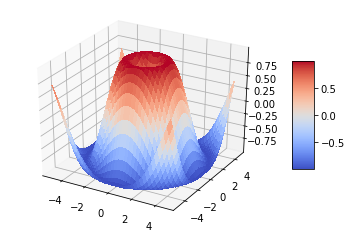

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

### Visualization of Rosenbrock Function as a Surface plot

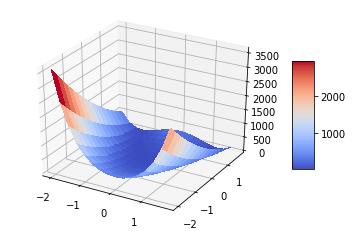

In [8]:
def rosenbrock(x, y):
    a = 1
    b = 100
    return (a-x)**2 + b*(y-x**2)**2

def visualize_surface_plot(x,y,z):
    x, y = np.meshgrid(x, y)
    z = rosenbrock(x,y)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    fig.colorbar(surf, shrink=0.5, aspect=5)


x = np.arange(-2, 2, 0.25)
y = np.arange(-2, 2, 0.25)
z = rosenbrock(x, y)
visualize_surface_plot(x,y,z)

### Calculating the Gradients of Rosenbrock Function

In [11]:
#2 functions with the same purpose and just different input format

def calculate_gradients(x):

    f = ((1-x[0])**2 + 100*(x[1]-x[0]**2)**2)
    f.backward()

    print(x.grad)

x = th.tensor([2., 3.], requires_grad=True)
calculate_gradients(x)


def calculate_gradients(x, y):

    f = ((1-x)**2 + 100*(y-x**2)**2)
    f.backward()

    print(x.grad)
    print(y.grad)

x = th.tensor([2.], requires_grad=True)
y = th.tensor([3.], requires_grad=True)

calculate_gradients(x, y)

tensor([ 802., -200.])
tensor([802.])
tensor([-200.])


### Optimizer Functions 

The optimizer functions written manually and using Pytorch Optimizer Class respectively:

t =  3874 
x1_t =  1.7068344354629517 
x2_t =  2.915191173553467 
f_t =  0.49999454617500305 



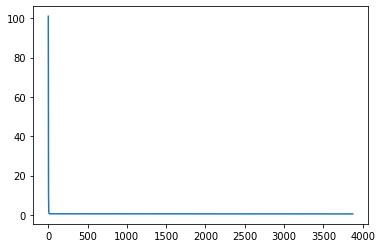

In [12]:
# Manual optimizing (Without using Pytorch Optimizer Class)
def optimize_manual(x1, x2, l, lr=1e-4):
    f = rosenbrock(x1, x2)
    history = []
    while f>l:

        x1.grad = th.tensor([0.])
        x2.grad = th.tensor([0.])

        f = rosenbrock(x1, x2)
        f.backward()
        
        #optimizer
        with th.no_grad():
            x1 += -1 * x1.grad * lr
            x2 += -1 * x2.grad * lr

        history.append((x1.item(), x2.item(), f.item()))

    return np.array(history)
    
x1 = th.tensor([2.], requires_grad=True)
x2 = th.tensor([3.], requires_grad=True)

history = optimize_manual(x1, x2, l=0.5)

print("t = ", len(history), "\nx1_t = ", history[-1][0], "\nx2_t = ", history[-1][1], "\nf_t = ", history[-1][2], "\n")
plt.plot(history[:,2])

Task: Implement a function optimize which takes an parameter $x \in R^2$, a "PyTorch" optimizer, and a lower bound l as its arguments. Your function has to use the optimizer to update the parameter x to find a local minimum of the Rosenbrock function but you can stop the interation if f(x) ≤ l. In addition, your function has to return a list of positions $(x^{(t)}, f(x^{(t)})$ where $x^{(t)}$ is the value of the parameter after t-th update step.

t =  3874 
x1_t =  1.706836462020874 
x2_t =  2.9151980876922607 
f_t =  0.49999743700027466 



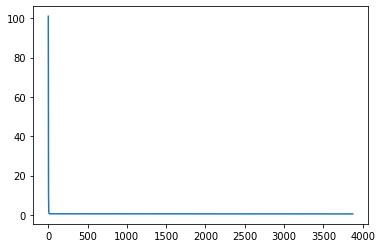

In [13]:
# Optimizing using pytorch optimizer
def optimize(x1, x2, optimizer, l):

    f = rosenbrock(x1, x2)
    history = []

    while f>l:
        optimizer.zero_grad()
        f = rosenbrock(x1, x2)
        f.backward()
        optimizer.step()
        history.append((x1.item(), x2.item(), f.item()))
    return np.array(history)

x1 = th.tensor([2.], requires_grad=True)
x2 = th.tensor([3.], requires_grad=True)

optimizer = th.optim.SGD([x1, x2], lr=1e-4)
history = optimize(x1, x2, optimizer, l=0.5)

print("t = ", len(history), "\nx1_t = ", history[-1][0], "\nx2_t = ", history[-1][1], "\nf_t = ", history[-1][2], "\n")
plt.plot(history[:,2])

Task: Visualize the path the parameter took to reach a local minimum when optimized with a SGD optimizer without momentum, with momentum and with NAG momentum
(visualize the behavior for $α \in$ {0.1; 0.5; 0.9} in both cases). Set the lower bound to l = 0:01, the learning rate to η=0.0001, and start every optimization run at the point $x = (−1.5, 1.5)^T $.

In [14]:
#-------------------------- without Momentum ------------------------------

x1 = th.tensor([-1.5], requires_grad=True)
x2 = th.tensor([1.5], requires_grad=True)

optimizer = th.optim.SGD([x1, x2], lr=1e-4, nesterov=False)
history_1 = optimize(x1, x2, optimizer, l=0.01)

print("without Momentum:\n", "t = ", len(history_1), "\nx1[t] = ", history_1[-1][0], "\nx2[t] = ", history_1[-1][1], "\nf[t] = ", history_1[-1][2], "\n")
#plt.plot(history_1[:,2])


#-----------------------------with Momentum---------------------------

x1 = th.tensor([-1.5], requires_grad=True)
x2 = th.tensor([1.5], requires_grad=True)

optimizer = th.optim.SGD([x1, x2], lr=1e-4, nesterov=False, momentum = 0.1)
history_2 = optimize(x1, x2, optimizer, l=0.01)

print("with Momentum and momentum=0.1 \n", "t = ", len(history_2), "\nx1[t] = ", history_2[-1][0], "\nx2[t] = ", history_2[-1][1], "\nf[t] = ", history_2[-1][2], "\n")
#plt.plot(history_2[:,2])

#----------------------------------------------------------------------------------------

x1 = th.tensor([-1.5], requires_grad=True)
x2 = th.tensor([1.5], requires_grad=True)

optimizer = th.optim.SGD([x1, x2], lr=1e-4, nesterov=False, momentum = 0.5)
history_3 = optimize(x1, x2, optimizer, l=0.01)

print("with Momentum and momentum=0.5 \n", "t = ", len(history_3), "\nx1[t] = ", history_3[-1][0], "\nx2[t] = ", history_3[-1][1], "\nf[t] = ", history_3[-1][2], "\n")
#plt.plot(history_3[:,2])

#----------------------------------------------------------------------------------------

x1 = th.tensor([-1.5], requires_grad=True)
x2 = th.tensor([1.5], requires_grad=True)

optimizer = th.optim.SGD([x1, x2], lr=1e-4, nesterov=False, momentum = 0.9)
history_4 = optimize(x1, x2, optimizer, l=0.01)

print("with Momentum and momentum=0.9 \n", "t = ", len(history_4), "\nx1[t] = ", history_4[-1][0], "\nx2[t] = ", history_4[-1][1], "\nf[t] = ", history_4[-1][2], "\n")
#plt.plot(history_4[:,2])

#-------------------- with Nesterov Accelerated Gradient ------------------------------------

x1 = th.tensor([-1.5], requires_grad=True)
x2 = th.tensor([1.5], requires_grad=True)

optimizer = th.optim.SGD([x1, x2], lr=1e-4, nesterov=True, momentum = 0.1)
history1 = optimize(x1, x2, optimizer, l=0.01)

print("with Nesterov Momentum and momentum=0.1 \n", "t = ", len(history1), "\nx1[t] = ", history1[-1][0], "\nx2[t] = ", history1[-1][1], "\nf[t] = ", history1[-1][2], "\n")
#plt.plot(history1[:,2])

#----------------------------------------------------------------------------------------

x1 = th.tensor([-1.5], requires_grad=True)
x2 = th.tensor([1.5], requires_grad=True)

optimizer = th.optim.SGD([x1, x2], lr=1e-4, nesterov=True, momentum = 0.5)
history2 = optimize(x1, x2, optimizer, l=0.01)

print("with Nesterov Momentum and momentum=0.5 \n", "t = ", len(history2), "\nx1[t] = ", history2[-1][0], "\nx2[t] = ", history2[-1][1], "\nf[t] = ", history2[-1][2], "\n")
#plt.plot(history2[:,2])

#----------------------------------------------------------------------------------------

x1 = th.tensor([-1.5], requires_grad=True)
x2 = th.tensor([1.5], requires_grad=True)

optimizer = th.optim.SGD([x1, x2], lr=1e-4, nesterov=True, momentum = 0.9)
history3 = optimize(x1, x2, optimizer, l=0.01)

print("with Nesterov Momentum and momentum=0.9 \n", "t = ", len(history3), "\nx1[t] = ", history3[-1][0], "\nx2[t] = ", history3[-1][1], "\nf[t] = ", history3[-1][2], "\n")
#plt.plot(history3[:,2])

without Momentum:
 t =  42576 
x1[t] =  0.900095522403717 
x2[t] =  0.8097472786903381 
f[t] =  0.009999886155128479 

with Momentum and momentum=0.1 
 t =  38316 
x1[t] =  0.9000973105430603 
x2[t] =  0.8097506165504456 
f[t] =  0.009999614208936691 

with Momentum and momentum=0.5 
 t =  21274 
x1[t] =  0.9001041054725647 
x2[t] =  0.8097630143165588 
f[t] =  0.009999087080359459 

with Momentum and momentum=0.9 
 t =  4153 
x1[t] =  0.9001488089561462 
x2[t] =  0.8098435997962952 
f[t] =  0.009997709654271603 

with Nesterov Momentum and momentum=0.1 
 t =  38317 
x1[t] =  0.9000980257987976 
x2[t] =  0.8097519278526306 
f[t] =  0.0099994707852602 

with Nesterov Momentum and momentum=0.5 
 t =  21279 
x1[t] =  0.9001013040542603 
x2[t] =  0.8097579479217529 
f[t] =  0.009999646805226803 

with Nesterov Momentum and momentum=0.9 
 t =  4208 
x1[t] =  0.9001734852790833 
x2[t] =  0.8098883032798767 
f[t] =  0.009992755018174648 



In [ ]:
fig, axs = plt.subplots(7, figsize=(30,20), dpi=150, sharex=False, sharey=False)

axs[0].plot(history_1[:,2]); axs[0].set_title('momentum 0.1')

axs[1].plot(history_2[:,2]); axs[0].set_title('momentum 0.1')
axs[2].plot(history_3[:,2]); axs[1].set_title('momentum 0.5')
axs[3].plot(history_4[:,2]); axs[2].set_title('momentum 0.9')

axs[4].plot(history1[:,2]); axs[0].set_title('momentum 0.1')
axs[5].plot(history2[:,2]); axs[1].set_title('momentum 0.5')
axs[6].plot(history3[:,2]); axs[2].set_title('momentum 0.9')

## Constrained Optimization

TO BE CONTUNIED:

In [ ]:
class ConstraintOptimizer(th.optim.Optimizer):
    def __init__(self, parameters, lr):
        super(ConstraintOptimizer, self).__init__(parameters, lr)

    @th.no_grad()
    def step(self, closure=None):
        loss = None
        if closure is not None:
            with th.enable_grad():
                loss = closure()